In [ ]:
#Solo usar si esta en colab
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/proyectoia')
print(os.getcwd())

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/proyectoia


#Clasificacion de anomalias de la columna vertebral
### Proyecto final Inteligencia artificial-2020-1
Presentado por: Juan Sebastian Leon Rodriguez, Laura Sofía Vargas González, Julian Colmenares.

---



In [ ]:
#PROYECTO FINAL INTELIGENCIA ARTIFICIAL
#Julian David Colmenares
#Juan Sebastian Leon
#Laura Sofia Vargas 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import *
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

1. Descargamos los datasets para nuestro proyecto.

Para la realizacion de este proyecto contamos con dos datasets que contienen exactamente los mismos datos, a excepcion de la columna 'class'; en el primer dataset se clasifica entre 'Anormal' y 'Normal', mientras que en el segundo se encuentran 3 diferentes clases, 'Normal', 'Hernia' y 'Spondylolisthesis', es decir que el segundo dataset identifica un diagnostico especifico para la anomalia. 

---



In [ ]:
data2 = pd.read_csv('datasets_469690_880822_column_3C.csv')
data1 = pd.read_csv('datasets_469690_880822_column_2C.csv')

In [ ]:
data1.head()

pelvic_incidence  pelvic_tilt  ...  degree_spondylolisthesis     class
0         63.027817    22.552586  ...                 -0.254400  Abnormal
1         39.056951    10.060991  ...                  4.564259  Abnormal
2         68.832021    22.218482  ...                 -3.530317  Abnormal
3         69.297008    24.652878  ...                 11.211523  Abnormal
4         49.712859     9.652075  ...                  7.918501  Abnormal

[5 rows x 7 columns]

In [ ]:
data2.head()

pelvic_incidence  pelvic_tilt  ...  degree_spondylolisthesis   class
0         63.027817    22.552586  ...                 -0.254400  Hernia
1         39.056951    10.060991  ...                  4.564259  Hernia
2         68.832021    22.218482  ...                 -3.530317  Hernia
3         69.297008    24.652878  ...                 11.211523  Hernia
4         49.712859     9.652075  ...                  7.918501  Hernia

[5 rows x 7 columns]

In [ ]:
#comprobamos el tamaño de nuestros dateset
print(data1.shape)
print(data2.shape)

(310, 7)
(310, 7)


2. Realizamos un analisis de la cantidad de datos de cada clase para el primer dataset

In [ ]:
#Dividimos el dataset para observar cuantos datos hay de cada clase
dataAbnormal=data1[data1['class']=='Abnormal']
dataNormal=data1[data1['class']!='Abnormal']
print(dataNormal.shape)
print(dataAbnormal.shape)

(100, 7)
(210, 7)


como se puede observar, hay un desbalance de clases que posteriormente solucionaremos.

In [ ]:
#uniendo los dos dataset nuevamente
dataBin = pd.concat((dataNormal, dataAbnormal)).sample(frac=1).reset_index(drop=True)

#Para trabajar con valores enteros en vez de cadenas de texto, cambiamos los valores 'Normal' por 0, y 'Abnormal' por 1
dataBin=dataBin.replace(to_replace='Normal', value=0, regex=True)
dataBin=dataBin.replace(to_replace='Abnormal', value=1, regex=True)
dataBin=np.random.permutation(dataBin.values)
dataBin=pd.DataFrame(dataBin)
dataBin.head(10)

0          1          2          3           4          5    6
0  66.507179  20.897672  31.727471  45.609507  128.902905   1.517203  0.0
1  85.581710  30.457039  78.231379  55.124672  114.866049  68.376122  1.0
2  63.172987   6.330911  63.000000  56.842076  110.644021  42.608076  1.0
3  65.007964  27.602608  50.947519  37.405357  116.581109   7.015978  1.0
4  70.399308  13.469986  61.200000  56.929322  102.337524  25.538429  1.0
5  66.285394  26.327845  47.500000  39.957549  121.219684  -0.799624  1.0
6  47.744679  12.089351  39.000000  35.655328  117.512004  21.682401  1.0
7  43.790190  13.533753  42.690814  30.256437  125.002893  13.289018  1.0
8  49.828135  16.736435  28.000000  33.091700  121.435558   1.913307  0.0
9  59.785265  17.879323  59.206461  41.905942  119.319111  22.123869  1.0

3. Verificamos si existe correlación entre las diferentes columnas del dataset

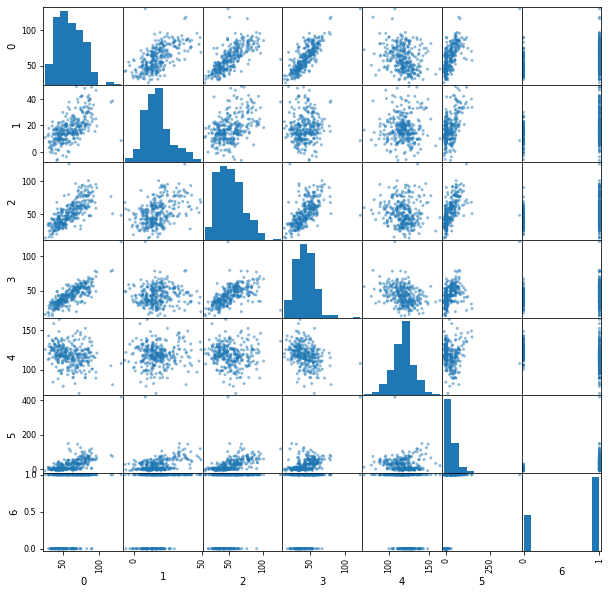

In [ ]:
pd.plotting.scatter_matrix(dataBin, figsize=(10,10));

4. Separamos los datos de Train y de Test para el primer dataset.

In [ ]:
#dividimos entre 0 y 1 (Abnormal y Normal)
dataAbnormal=dataBin[dataBin[6]==1]
dataNormal=dataBin[dataBin[6]!=1]

#permutamos abnormales y Normales
np.random.permutation(dataAbnormal.values)
np.random.permutation(dataNormal.values)

#elegimos 90 abnomales y 90 normales para realizar el entrenamiento
dataAbnormalFit=dataAbnormal.values[:90,:]
dataNormalFit=dataNormal.values[:90, :]

#el resto de los datos los tomamos para test
dataAbnormalTest=dataAbnormal.values[90:,:]
dataNormalTest=dataNormal.values[90:,:]

dataAbnormalFit=pd.DataFrame(dataAbnormalFit)
dataNormalFit=pd.DataFrame(dataNormalFit)
dataAbnormalTest=pd.DataFrame(dataAbnormalTest)
dataNormalTest=pd.DataFrame(dataNormalTest)


In [ ]:
#unir test y fit en cada dataset
dataBinTrain=pd.concat([dataAbnormalFit, dataNormalFit])
dataBinTest=pd.concat([dataAbnormalTest, dataNormalTest])
#dataBinTrain.shape
dataBinTrain.head(10)

0          1          2          3           4          5    6
0  85.581710  30.457039  78.231379  55.124672  114.866049  68.376122  1.0
1  63.172987   6.330911  63.000000  56.842076  110.644021  42.608076  1.0
2  65.007964  27.602608  50.947519  37.405357  116.581109   7.015978  1.0
3  70.399308  13.469986  61.200000  56.929322  102.337524  25.538429  1.0
4  66.285394  26.327845  47.500000  39.957549  121.219684  -0.799624  1.0
5  47.744679  12.089351  39.000000  35.655328  117.512004  21.682401  1.0
6  43.790190  13.533753  42.690814  30.256437  125.002893  13.289018  1.0
7  59.785265  17.879323  59.206461  41.905942  119.319111  22.123869  1.0
8  35.703458  19.443253  20.700000  16.260205  137.540613  -0.263490  1.0
9  43.718262   9.811985  52.000000  33.906277   88.434242  40.880923  1.0

In [ ]:
#permutamos de nuevo antes de pasar a entrenar

dataBinTrain=np.random.permutation(dataBinTrain.values)
dataBinTest=np.random.permutation(dataBinTest.values)
#dataBinTrain=pd.DataFrame(dataBinTrain)
#dataBinTest=pd.DataFrame(dataBinTest)
#dataBinTrain.head(10)

5. Nos disponemos a entrenar con diferentes estimadores. Para facilitar esta tarea crearemos 

In [ ]:
#Creamos una tabla para comparar a futuro los diferentes estimadores
Tabla=np.array([['Estimador', 'Score']])
print(Tabla)
TablaCross=np.array([['Estimador Cross', 'Score']])
print(TablaCross)
x=np.array([])

[['Estimador' 'Score']]
[['Estimador Cross' 'Score']]


In [ ]:
#Separamos los labels
X_train = dataBinTrain[:,:-1]
X_test = dataBinTest[:,:-1]
y_train = dataBinTrain[:,-1]
y_test = dataBinTest[:,-1]

In [ ]:
# Funcion para entrenar con diferentes clasificadores
def Train_Test(est, Tabla):
  est.fit(X_train,y_train)
  predictions=est.predict(X_test)
  score=accuracy_score(predictions,y_test)
  Tabla=np.append(Tabla, [[est, score]], axis=0)
  return Tabla

In [ ]:
# Funcion para entrenar con diferentes clasificadores APLICANDO CROSS VALIDATION
def Train_Test_cross(est, TablaCross):
  score = cross_val_score(est, X_train, y_train, cv=KFold(20, shuffle=True), scoring=make_scorer(mean_squared_error))
  #score = cross_val_score(estimator, X_train, y_train, cv=KFold(20, shuffle=True), scoring=make_scorer(mean_squared_error))
  score = np.mean(score)
  TablaCross=np.append(TablaCross, [[est, 1-score]], axis=0)
  return TablaCross

Se hace uso de diferentes tipos de estimadores para realizar una comparacion de los resultados.

In [ ]:
#Llamamos a la funcion de train con diferentes clasificadores

#Estimadores Gaussian NB
est = GaussianNB()
Tabla=Train_Test(est, Tabla)
TablaCross=Train_Test_cross(est, TablaCross)
x=np.append(x, ['GaussianNB'], axis=0)

In [ ]:
#Estimadores DecisionTree
est = DecisionTreeClassifier()
Tabla=Train_Test(est, Tabla)
TablaCross=Train_Test_cross(est, TablaCross)
x=np.append(x, ['DecisionTree'], axis=0)

est = DecisionTreeClassifier(max_depth=10)
Tabla=Train_Test(est, Tabla)
TablaCross=Train_Test_cross(est, TablaCross)
x=np.append(x, ['DecisionTree(max_depth=10)'], axis=0)

est = DecisionTreeClassifier(max_depth=20)
Tabla=Train_Test(est, Tabla)
TablaCross=Train_Test_cross(est, TablaCross)
x=np.append(x, ['DecisionTree(max_depth=20)'], axis=0)

est = DecisionTreeClassifier(max_depth=30)
Tabla=Train_Test(est, Tabla)
TablaCross=Train_Test_cross(est, TablaCross)
x=np.append(x, ['DecisionTree(max_depth=30)'], axis=0)

In [ ]:
#Estimadores SVC
est = SVC()
Tabla=Train_Test(est, Tabla)
TablaCross=Train_Test_cross(est, TablaCross)
x=np.append(x, ['SVC()'], axis=0)

est = SVC(kernel='linear')
Tabla=Train_Test(est, Tabla)
TablaCross=Train_Test_cross(est, TablaCross)
x=np.append(x, ['SVC(kernel=linear)'], axis=0)

In [ ]:
est = SVC(kernel='poly', degree=2, gamma='scale')
Tabla=Train_Test(est, Tabla)
TablaCross=Train_Test_cross(est, TablaCross)
x=np.append(x, ['SVC(kernel=poly, degree=2)'], axis=0)

est = SVC(kernel='poly', degree=3, gamma='scale')
Tabla=Train_Test(est, Tabla)
TablaCross=Train_Test_cross(est, TablaCross)
x=np.append(x, ['SVC(kernel=poly, degree=3)'], axis=0)

In [ ]:
Tabla=pd.DataFrame(Tabla)
TablaCross=pd.DataFrame(TablaCross)

In [ ]:
Tabla.columns = ['Estimador', 'Score']
Tabla=Tabla.drop([0],axis=0)
Tabla.head(10)

Estimador     Score
1       GaussianNB(priors=None, var_smoothing=1e-09)  0.723077
2  DecisionTreeClassifier(ccp_alpha=0.0, class_we...  0.769231
3  DecisionTreeClassifier(ccp_alpha=0.0, class_we...  0.769231
4  DecisionTreeClassifier(ccp_alpha=0.0, class_we...  0.776923
5  DecisionTreeClassifier(ccp_alpha=0.0, class_we...  0.769231
6  SVC(C=1.0, break_ties=False, cache_size=200, c...  0.715385
7  SVC(C=1.0, break_ties=False, cache_size=200, c...  0.815385
8  SVC(C=1.0, break_ties=False, cache_size=200, c...  0.746154
9  SVC(C=1.0, break_ties=False, cache_size=200, c...  0.792308

In [ ]:
TablaCross.columns = ['Estimador con Cross', 'Score']
TablaCross=TablaCross.drop([0],axis=0)
TablaCross.head(10)

Estimador con Cross     Score
1       GaussianNB(priors=None, var_smoothing=1e-09)  0.816667
2  DecisionTreeClassifier(ccp_alpha=0.0, class_we...  0.794444
3  DecisionTreeClassifier(ccp_alpha=0.0, class_we...  0.788889
4  DecisionTreeClassifier(ccp_alpha=0.0, class_we...  0.811111
5  DecisionTreeClassifier(ccp_alpha=0.0, class_we...  0.811111
6  SVC(C=1.0, break_ties=False, cache_size=200, c...  0.844444
7  SVC(C=1.0, break_ties=False, cache_size=200, c...  0.827778
8  SVC(C=1.0, break_ties=False, cache_size=200, c...  0.833333
9  SVC(C=1.0, break_ties=False, cache_size=200, c...  0.827778

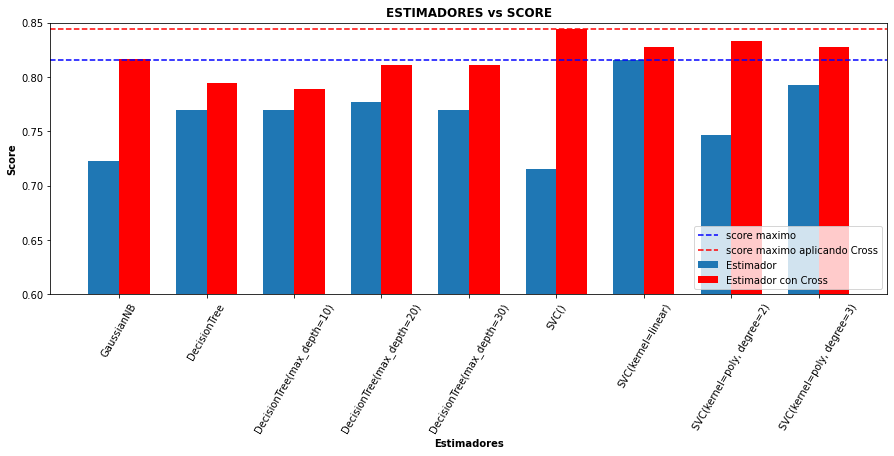

In [ ]:
plt.figure(figsize=(15,5))
X = np.arange(Tabla.shape[0])
plt.bar(X - 0.35/2, Tabla.Score, 0.35, label='Estimador')
plt.bar(X + 0.35/2, TablaCross.Score, 0.35, label='Estimador con Cross', color = "r")
plt.axhline(y=Tabla['Score'].max(), color='b', linestyle='--', label='score maximo')
plt.axhline(y=TablaCross['Score'].max(), color='r', linestyle='--', label='score maximo aplicando Cross')
plt.xlabel('Estimadores', weight='bold')
plt.ylabel('Score', weight='bold')
plt.xticks(X, x)
plt.ylim(0.6, 0.85)
plt.xticks(rotation=60)
plt.title('ESTIMADORES vs SCORE', weight='bold')
plt.legend(loc='lower right')
plt.show()


In [ ]:
Tabla[Tabla['Score']==Tabla['Score'].max()]

Estimador     Score
7  SVC(C=1.0, break_ties=False, cache_size=200, c...  0.815385

In [ ]:
TablaCross[TablaCross['Score']==TablaCross['Score'].max()]

Estimador con Cross     Score
6  SVC(C=1.0, break_ties=False, cache_size=200, c...  0.844444

Como podemos observar, el mejor estimador no es el mismo para ambos casos, sin embargo la diferencia entre los score de cada uno es muy baja. Si consideramos que ninguno de los score es demasiado alto como para desconfiar de él, la mejor elccion es tomar el clasificador SVC con parametros por defecto mientras se aplica cross validation.

# **`Segundo dataset`**

In [ ]:
data2["class"].unique()

array(['Hernia', 'Spondylolisthesis', 'Normal'], dtype=object)

 **Eliminamos los casos Normales**

In [ ]:
## eliminamos lo casos normales
dataClass=data2[data2['class']!='Normal']

In [ ]:
##cambio de label "class" con 1='hernia' y 0='Spondylolisthesis'
dataClass=dataClass.replace(to_replace='Spondylolisthesis', value=0, regex=True)
dataClass=dataClass.replace(to_replace='Hernia', value=1, regex=True)
#dataClass=np.random.permutation(dataClass.values)
#mezclar valores de "dataClass"
dataClass =dataClass.sample(frac=1).reset_index(drop=True)

dataClass.head(10)


pelvic_incidence  pelvic_tilt  ...  degree_spondylolisthesis  class
0         84.974132    33.021175  ...                 74.333409      0
1         88.623908    29.089453  ...                 51.805899      0
2         64.809541    15.174078  ...                 21.407198      0
3         39.056951    10.060991  ...                  4.564259      1
4         42.021386    -6.554948  ...                 27.338671      0
5         31.232387    17.715819  ...                  0.499751      1
6         48.915551    19.964556  ...                  8.028895      1
7         46.855781    15.351514  ...                  1.662706      1
8         70.952728    20.159931  ...                 32.522331      0
9         43.349606     7.467469  ...                  5.753277      1

[10 rows x 7 columns]

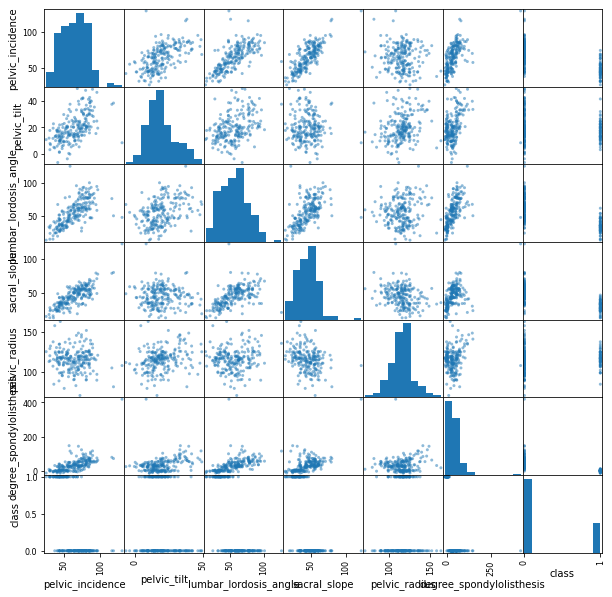

In [ ]:
pd.plotting.scatter_matrix(dataClass, figsize=(10,10));

In [ ]:
#dividimos entre 0 y 1
dataHernia=dataClass[dataClass['class']==1]
dataSpondylolisthesis=dataClass[dataClass['class']!=1]
print(dataHernia.shape)
print(dataSpondylolisthesis.shape)

(60, 7)
(150, 7)


In [ ]:
#elegimos 35 Hernia y 35 Spondylolisthesis
dataSpondylolisthesisTrain=dataSpondylolisthesis.values[:35,:]
dataHerniaTrain=dataHernia.values[:35, :]
print(dataSpondylolisthesisTrain.shape,dataHerniaTrain.shape,"train")

#elegimos datos del test con los restantes
dataSpondylolisthesisTest=dataSpondylolisthesis.values[35:,:]
dataHerniaTest=dataHernia.values[35:,:]
print(dataSpondylolisthesisTest.shape,dataHerniaTest.shape,"test")


(35, 7) (35, 7) train
(115, 7) (25, 7) test


In [ ]:
#permutamos Hernia y Spondylolisthesis tanto test como train
np.random.permutation(dataHerniaTrain)
np.random.permutation(dataSpondylolisthesisTrain)
np.random.permutation(dataHerniaTest)
np.random.permutation(dataSpondylolisthesisTest)

#convertimos de nuevo los datos de formato numpy a dataframe 
dataSpondylolisthesisFit=pd.DataFrame(dataSpondylolisthesisTest)
dataHerniaFit=pd.DataFrame(dataHerniaTest)
dataSpondylolisthesisTrain=pd.DataFrame(dataSpondylolisthesisTrain)
dataHerniaTrain=pd.DataFrame(dataHerniaTrain)

In [ ]:
#unimops de nuevo los dataframe
dataClassTrain=pd.concat([dataSpondylolisthesisTrain, dataHerniaTrain])
dataClassTest=pd.concat([dataSpondylolisthesisFit, dataHerniaFit])
print(dataClassTest.shape)

(140, 7)


In [ ]:
#permutamos de nuevo antes de pasar a aentrenar
dataClassTrain=np.random.permutation(dataClassTrain.values)
dataClassTest=np.random.permutation(dataClassTest.values)
dataClassTrain=pd.DataFrame(dataClassTrain)
dataClassTest=pd.DataFrame(dataClassTest)
dataClassTrain.head(10)

0          1          2          3           4          5    6
0  57.300227  24.188885  47.000000  33.111342  116.806587   5.766947  1.0
1  67.263149   7.194661  51.696887  60.068488   97.801085  42.136943  0.0
2  46.855781  15.351514  38.000000  31.504267  116.250917   1.662706  1.0
3  54.741775  12.095072  41.000000  42.646703  117.643219  40.382327  0.0
4  43.203185  19.663146  35.000000  23.540039  124.846109  -2.919076  1.0
5  31.484218   7.826221  24.284818  23.657997  113.833145   4.393080  1.0
6  54.919443  21.062332  42.200000  33.857110  125.212716   2.432561  1.0
7  74.433593  41.557331  27.700000  32.876262  107.949304   5.000089  1.0
8  44.551012  21.931147  26.785916  22.619865  111.072920   2.652321  1.0
9  43.790190  13.533753  42.690814  30.256437  125.002893  13.289018  1.0

In [ ]:
X_train = dataClassTrain.values[:,:-1]
X_test = dataClassTest.values[:,:-1]
y_train = dataClassTrain.values[:,-1]
y_test = dataClassTest.values[:,-1]

In [ ]:
#Creamos una tabla para comparar a futuro los diferentes estimadores
Tabla2=np.array([['Estimador', 'Score']])
print(Tabla2)
TablaCross2=np.array([['Estimador', 'Score']])
print(TablaCross2)
x=np.array([])

[['Estimador' 'Score']]
[['Estimador' 'Score']]


In [ ]:
#Llamamos a la funcion de train con diferentes clasificadores

#Estimadores Gaussian NB
est = GaussianNB()
Tabla2=Train_Test(est, Tabla2)
TablaCross2=Train_Test_cross(est, TablaCross2)
x=np.append(x, ['GaussianNB()'], axis=0)

In [ ]:
#Estimadores DecisionTree
est = DecisionTreeClassifier()
Tabla2=Train_Test(est, Tabla2)
TablaCross2=Train_Test_cross(est, TablaCross2)
x=np.append(x, ['DecisionTree'], axis=0)

est = DecisionTreeClassifier(max_depth=10)
Tabla2=Train_Test(est, Tabla2)
TablaCross2=Train_Test_cross(est, TablaCross2)
x=np.append(x, ['DecisionTree(max_depth=10)'], axis=0)

est = DecisionTreeClassifier(max_depth=20)
Tabla2=Train_Test(est, Tabla2)
TablaCross2=Train_Test_cross(est, TablaCross2)
x=np.append(x, ['DecisionTree(max_depth=20)'], axis=0)

est = DecisionTreeClassifier(max_depth=30)
Tabla2=Train_Test(est, Tabla2)
TablaCross2=Train_Test_cross(est, TablaCross2)
x=np.append(x, ['DecisionTree(max_depth=30)'], axis=0)

In [ ]:
#Estimadores SVC
est = SVC()
Tabla2=Train_Test(est, Tabla2)
TablaCross2=Train_Test_cross(est, TablaCross2)
x=np.append(x, ['SVC()'], axis=0)

est = SVC(kernel='linear')
Tabla2=Train_Test(est, Tabla2)
TablaCross2=Train_Test_cross(est, TablaCross2)
x=np.append(x, ['SVC(kernel=linear)'], axis=0)

In [ ]:
est = SVC(kernel='poly', degree=2, gamma='scale')
Tabla2=Train_Test(est, Tabla2)
TablaCross2=Train_Test_cross(est, TablaCross2)
x=np.append(x, ['GaussianNB()'], axis=0)

est = SVC(kernel='poly', degree=2, gamma='auto')
Tabla2=Train_Test(est, Tabla2)
TablaCross2=Train_Test_cross(est, TablaCross2)
x=np.append(x, ['SVC(kernel=poly, degree=2)'], axis=0)

est = SVC(kernel='poly', degree=3, gamma='scale')
Tabla2=Train_Test(est, Tabla2)
TablaCross2=Train_Test_cross(est, TablaCross2)
x=np.append(x, ['SVC(kernel=poly, degree=3)'], axis=0)

In [ ]:
print(Tabla2)
print(TablaCross2)


[['Estimador' 'Score']
 [GaussianNB(priors=None, var_smoothing=1e-09) 0.9857142857142858]
 [DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
  0.9642857142857143]
 [DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
  0.9642857142857143]
 [Decision

In [ ]:
Tabla2=pd.DataFrame(Tabla2)
TablaCross2=pd.DataFrame(TablaCross2)

In [ ]:
Tabla2.columns = ['Estimador', 'Score']
Tabla2=Tabla2.drop([0],axis=0)
Tabla2.head(10)

Estimador     Score
1        GaussianNB(priors=None, var_smoothing=1e-09)  0.985714
2   DecisionTreeClassifier(ccp_alpha=0.0, class_we...  0.964286
3   DecisionTreeClassifier(ccp_alpha=0.0, class_we...  0.964286
4   DecisionTreeClassifier(ccp_alpha=0.0, class_we...  0.964286
5   DecisionTreeClassifier(ccp_alpha=0.0, class_we...  0.964286
6   SVC(C=1.0, break_ties=False, cache_size=200, c...  0.957143
7   SVC(C=1.0, break_ties=False, cache_size=200, c...  0.957143
8   SVC(C=1.0, break_ties=False, cache_size=200, c...  0.928571
9   SVC(C=1.0, break_ties=False, cache_size=200, c...  0.957143
10  SVC(C=1.0, break_ties=False, cache_size=200, c...  0.914286

In [ ]:
TablaCross2.columns = ['Estimador con Cross', 'Score']
TablaCross2=TablaCross2.drop([0],axis=0)
TablaCross2.head(10)

Estimador con Cross     Score
1        GaussianNB(priors=None, var_smoothing=1e-09)      0.95
2   DecisionTreeClassifier(ccp_alpha=0.0, class_we...  0.970833
3   DecisionTreeClassifier(ccp_alpha=0.0, class_we...     0.975
4   DecisionTreeClassifier(ccp_alpha=0.0, class_we...  0.970833
5   DecisionTreeClassifier(ccp_alpha=0.0, class_we...     0.975
6   SVC(C=1.0, break_ties=False, cache_size=200, c...     0.975
7   SVC(C=1.0, break_ties=False, cache_size=200, c...    0.9625
8   SVC(C=1.0, break_ties=False, cache_size=200, c...  0.983333
9   SVC(C=1.0, break_ties=False, cache_size=200, c...    0.9875
10  SVC(C=1.0, break_ties=False, cache_size=200, c...    0.9875

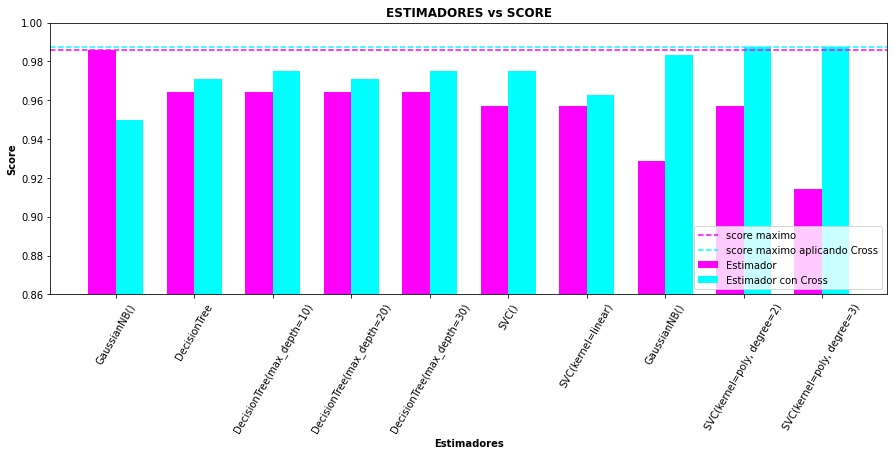

In [389]:
plt.figure(figsize=(15,5))
X = np.arange(Tabla2.shape[0])
plt.bar(X - 0.35/2, Tabla2.Score, 0.35, label='Estimador', color="MAGENTA")
plt.bar(X + 0.35/2, TablaCross2.Score, 0.35, label='Estimador con Cross', color = "CYAN")
plt.axhline(y=Tabla2['Score'].max(), color='MAGENTA', linestyle='--', label='score maximo')
plt.axhline(y=TablaCross2['Score'].max(), color='CYAN', linestyle='--', label='score maximo aplicando Cross')
plt.xlabel('Estimadores', weight='bold')
plt.ylabel('Score', weight='bold')
plt.xticks(X, x)
plt.ylim(0.86, 1)
plt.xticks(rotation=60)
plt.title('ESTIMADORES vs SCORE', weight='bold')
plt.legend(loc='lower right')
plt.show()